In [4]:
import vcsn

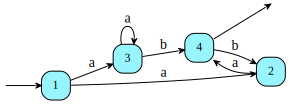

In [9]:
%%automaton a
context = "lal_char(ab), b"
$ -> 1
1 -> 3 a
1 -> 2 a
2 -> 4 a
3 -> 3 a
3 -> 4 b
4 -> 2 b
4 -> $

In [13]:
a.eval('abbb')

0

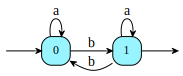

In [14]:
%%automaton bimpair
context = "lal_char(ab), b"
$ -> 0
0 -> 0 a
0 -> 1 b
1 -> 1 a
1 -> 0 b
1 -> $

In [15]:
bimpair.shortest(20)

b + ab + ba + aab + aba + baa + bbb + aaab + aaba + abaa + abbb + baaa + babb + bbab + bbba + aaaab + aaaba + aabaa + aabbb + abaaa

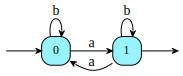

In [17]:
%%automaton aimpair
context = "lal_char(ab), b"
$ -> 0
0 -> 0 b
0 -> 1 a
1 -> 1 b
1 -> 0 a
1 -> $

In [19]:
interabimpair = aimpair & bimpair

In [20]:
interabimpair.expression()

(aa+bb)*(ab+ba)(aa+bb+(ab+ba)(aa+bb)*(ab+ba))*

In [29]:
# ex3

lal = vcsn.context("lal_char(abc), b")

In [30]:
lal.expression('[^]a[^]')

(a+b+c)a(a+b+c)

In [33]:
def exp(e):
    # If ’e’ is not a real expression object, convert it.
    return e if isinstance(e, vcsn.expression) else lal.expression(e)

In [36]:
def t1(re):
    re = exp(re)
    all = exp('[^]*')
    # * denotes the concatenation.
    return all * re * all

In [39]:
def t2(re):
    re = exp(re)
    all = exp('[^]*')
    # * denotes the concatenation.
    return all * re * all * re * all

In [51]:
def t3(re):
    re = exp(re)
    all = exp('[^]*')
    pos = exp('[^]{+} ')
    inter = (re * all) & (pos * re)
    # * denotes the concatenation.
    return all * inter * all

In [38]:
lal.expression('[^]*abc[^]*abc[^]*')

(a+b+c)*abc(a+b+c)*abc(a+b+c)*

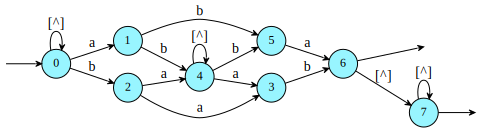

In [53]:
t3(lal.expression('ab + ba')).automaton()